In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [3]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [4]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_study=pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
duplicates=mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [7]:
clean_mice=mouse_study[mouse_study['Mouse ID'].isin(duplicates)==False]
clean_mice
clean=mouse_study

In [8]:
drug_regimen=clean_mice.set_index('Drug Regimen').groupby(['Drug Regimen'])
tumor_mean=drug_regimen['Tumor Volume (mm3)'].mean()
tumor_median=drug_regimen['Tumor Volume (mm3)'].median()
tumor_variance=drug_regimen['Tumor Volume (mm3)'].var()
tumor_std=drug_regimen['Tumor Volume (mm3)'].std()
tumor_sem=drug_regimen['Tumor Volume (mm3)'].sem()

In [9]:
summary_stat=pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Std. Dev.": tumor_std,
    "Std. Error": tumor_sem
})
summary_stat

,Mean,Median,Variance,Std. Dev.,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
summary_data=clean_mice.groupby(['Drug Regimen']).count()['Mouse ID']
summary_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

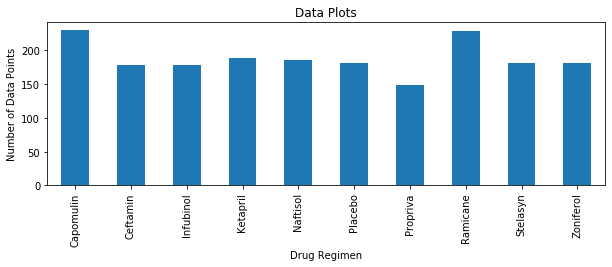

<Figure size 432x288 with 0 Axes>

In [11]:
summary_data.plot(kind="bar", figsize=(10,3))
plt.title("Data Plots")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


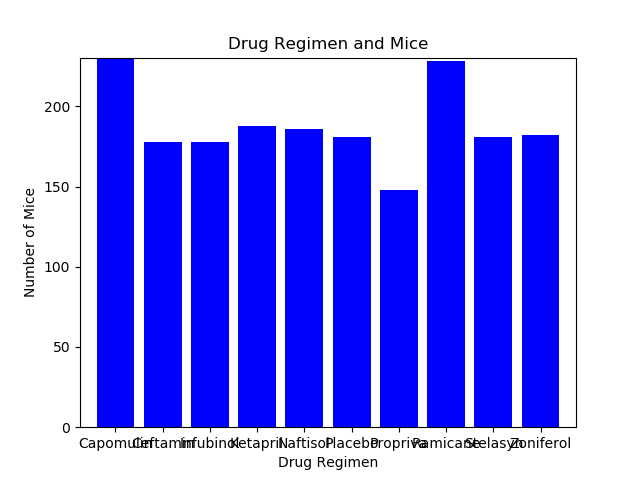

Text(0, 0.5, 'Number of Mice')

In [13]:
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182 ]
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice)+0.4)
plt.title("Drug Regimen and Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [68]:
gender_df = pd.DataFrame(mouse_study.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [69]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


<IPython.core.display.Javascript object>


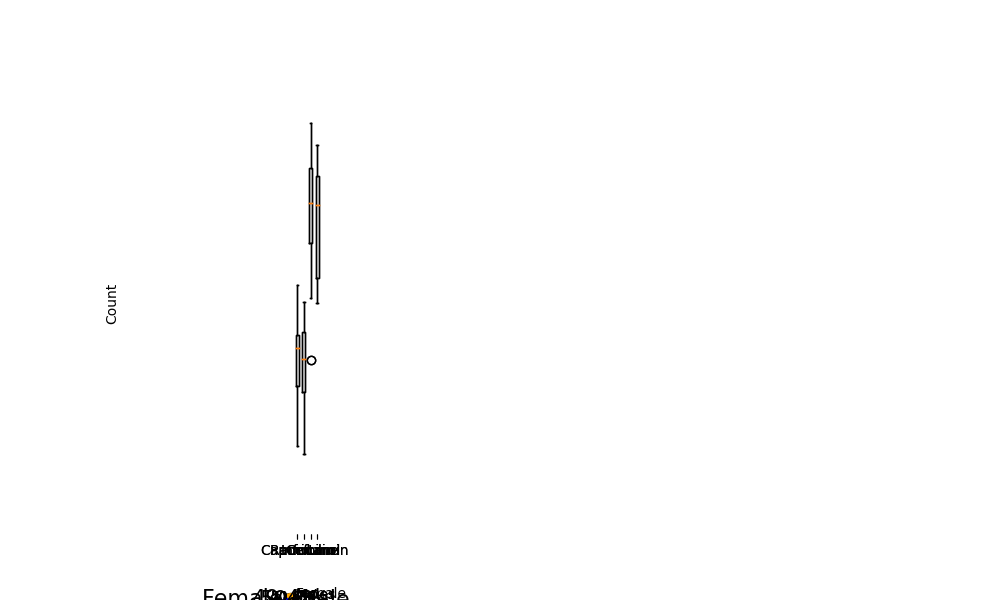

In [70]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [75]:
import matplotlib.pyplot as plt
gender_count = (mouse_study.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

In [76]:
labels = ["Females", "Males"]

colors = ["blue", "orange"]

explode = (0.1, 0)

In [77]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [78]:
import matplotlib.pyplot as plt
labels=["Male", "Female"]
sizes=[49.799197, 50.200803]
explode=(0.1, 0)
colors=["Blue", "Orange"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140 )
plt.axis("equal")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

In [17]:
best_treatment=mouse_study[mouse_study["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_treatment=best_treatment.sort_values(["Timepoint"], ascending=True)
best_treatment
best_treatment_data=best_treatment[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_treatment_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [22]:
Capomulin_df = best_treatment_data.loc[best_treatment_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = best_treatment_data.loc[best_treatment_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = best_treatment_data.loc[best_treatment_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = best_treatment_data.loc[best_treatment_data["Drug Regimen"] == "Ceftamin", :]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, best_treatment_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,b128,45,Capomulin,38.982878
1,b742,45,Capomulin,38.939633
2,f966,20,Capomulin,30.485985
3,g288,45,Capomulin,37.074024
4,g316,45,Capomulin,40.159220


In [33]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin's outliers :{lowerq, upperq}")

Capomulin's outliers :(32.37735684, 40.1592203)


In [32]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, best_treatment_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane's potential outliers: {lowerq, upperq}")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Ramicane's potential outliers: (31.56046955, 40.65900627)


In [31]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, best_treatment_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Infubinol's potential outliers: {lowerq}, {upperq}")
Infubinol_merge.to_csv("output.csv")

Infubinol's potential outliers: 54.04860769, 65.52574285


In [34]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, best_treatment_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin's outliers:{lowerq, upperq}")

Ceftamin's outliers:(48.72207785, 64.29983003)


In [81]:
best_treatment_sort = best_treatment_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_treatment_sort.head()
best_treatment_df = best_treatment_sort.to_frame()
best_treatment_df
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_df = best_treatment_df.reset_index()
tumor_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_list)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

In [42]:
capomulin_mouse = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_mouse.reset_index()
capomulin_mouse.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [44]:
single_capomulin=capomulin_mouse.loc[capomulin_mouse['Mouse ID']=="l509"]
single_capomulin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
196,371,l509,Capomulin,Male,17,21,0,45.000000,0
197,372,l509,Capomulin,Male,17,21,5,45.851193,0
198,373,l509,Capomulin,Male,17,21,10,46.759074,0
199,374,l509,Capomulin,Male,17,21,15,47.488599,1
200,375,l509,Capomulin,Male,17,21,20,48.070452,2
201,376,l509,Capomulin,Male,17,21,25,44.006257,2
202,377,l509,Capomulin,Male,17,21,30,44.708055,2
203,378,l509,Capomulin,Male,17,21,35,40.207289,2
204,379,l509,Capomulin,Male,17,21,40,40.770813,2
205,380,l509,Capomulin,Male,17,21,45,41.483008,3


<IPython.core.display.Javascript object>


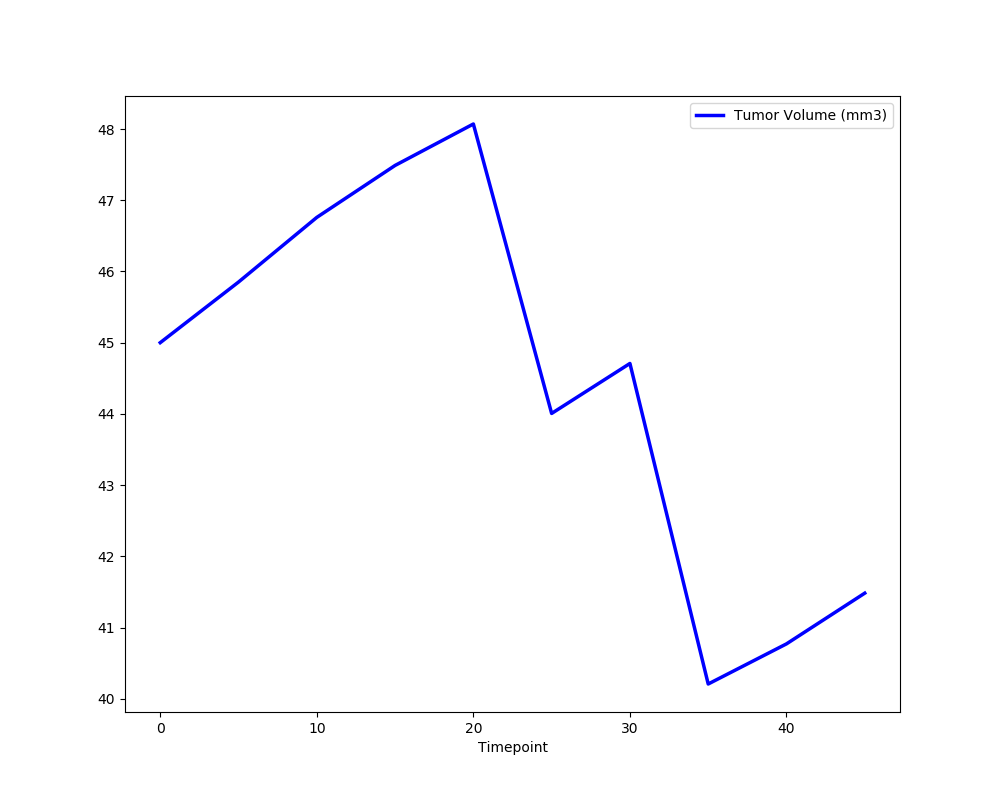

In [45]:
single_capomulin= single_capomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
single_capomulin = single_capomulin.reset_index(drop=True)
single_capomulin.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

In [48]:
capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [50]:
clean=capomulin_mouse.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
average_capomulin=pd.DataFrame(clean.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_capomulin.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [54]:
average_capomulin = average_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_capomulin

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


<IPython.core.display.Javascript object>


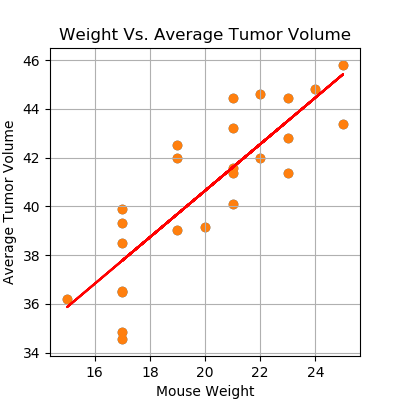

In [56]:
average_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()


In [66]:
import matplotlib.pyplot as plt
mouse_weight = average_capomulin.iloc[:,0]
avg_tumor_volume = average_capomulin.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [62]:
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()